In [2]:
voter_type='random_uniform_model'
num_voters=144
num_projects=600
total_op_tokens=30e6
num_rounds = 1000
# Add the directory containing the VotingModel to the Python path
import os
import sys
sys.path.append(os.path.abspath('/Users/idrees/Code/govxs/'))
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



from util.plot_results import plot_aggregation_results
from model.VotingModel import VotingModel

In [7]:

data_dir = '/Users/idrees/Code/govxs/data'
os.makedirs(data_dir, exist_ok=True)

model = VotingModel(voter_type=voter_type,num_voters=num_voters, num_projects=num_projects, total_op_tokens=total_op_tokens)
model.step()

results_df=model.compile_fund_allocations()

# Save the DataFrame to a CSV file in the data directory
results_df.to_csv(os.path.join(data_dir, 'fund_allocation_data.csv'), index=False)
print(results_df)

voting_df = pd.DataFrame(model.voting_matrix, columns=[f"Project {i+1}" for i in range(model.num_projects)])
voting_df['Voter'] = [f'Voter {i+1}' for i in range(model.num_voters)]

# Save the DataFrame to a CSV file in the data directory
voting_df.to_csv(os.path.join(data_dir, 'voting_data.csv'), index=False)
print(voting_df)

         Project  Mean Aggregation  Median Aggregation  Quadratic Aggregation
0      Project 1      46320.044202        49088.068407           47996.210619
1      Project 2      53245.227433        44358.677846           50825.551414
2      Project 3      45486.976411        43634.614172           47450.975296
3      Project 4      48079.527847        45860.658223           48841.976857
4      Project 5      57441.174489        53149.334257           53782.343813
..           ...               ...                 ...                    ...
595  Project 596      54131.139139        57794.246032           51171.317056
596  Project 597      51143.879188        46537.346292           50054.005384
597  Project 598      45495.037595        46109.566493           47798.335614
598  Project 599      47178.160095        45052.634025           48045.679860
599  Project 600      48876.476908        51701.050132           49673.425149

[600 rows x 4 columns]
         Project 1     Project 2     Pro

/Users/idrees/Code/govxs/agents/VoterAgent.py:7: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


Summary Statistics:
Mean Aggregation: Total Funds: 30000000.0, Max Funds: 68176.56477255965, Min Funds: 34074.77800351421
Median Aggregation: Total Funds: 30000000.0, Max Funds: 74752.03792023903, Min Funds: 33128.0092607653
Quadratic Aggregation: Total Funds: 29999999.999999996, Max Funds: 58913.0365306376, Min Funds: 40949.70108208197


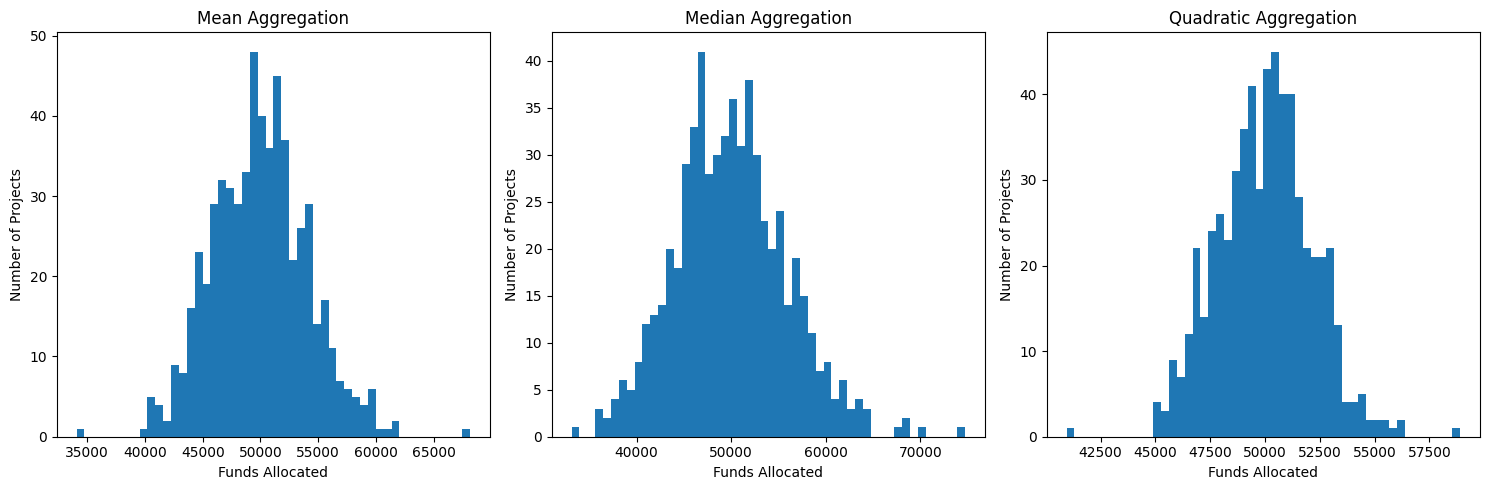

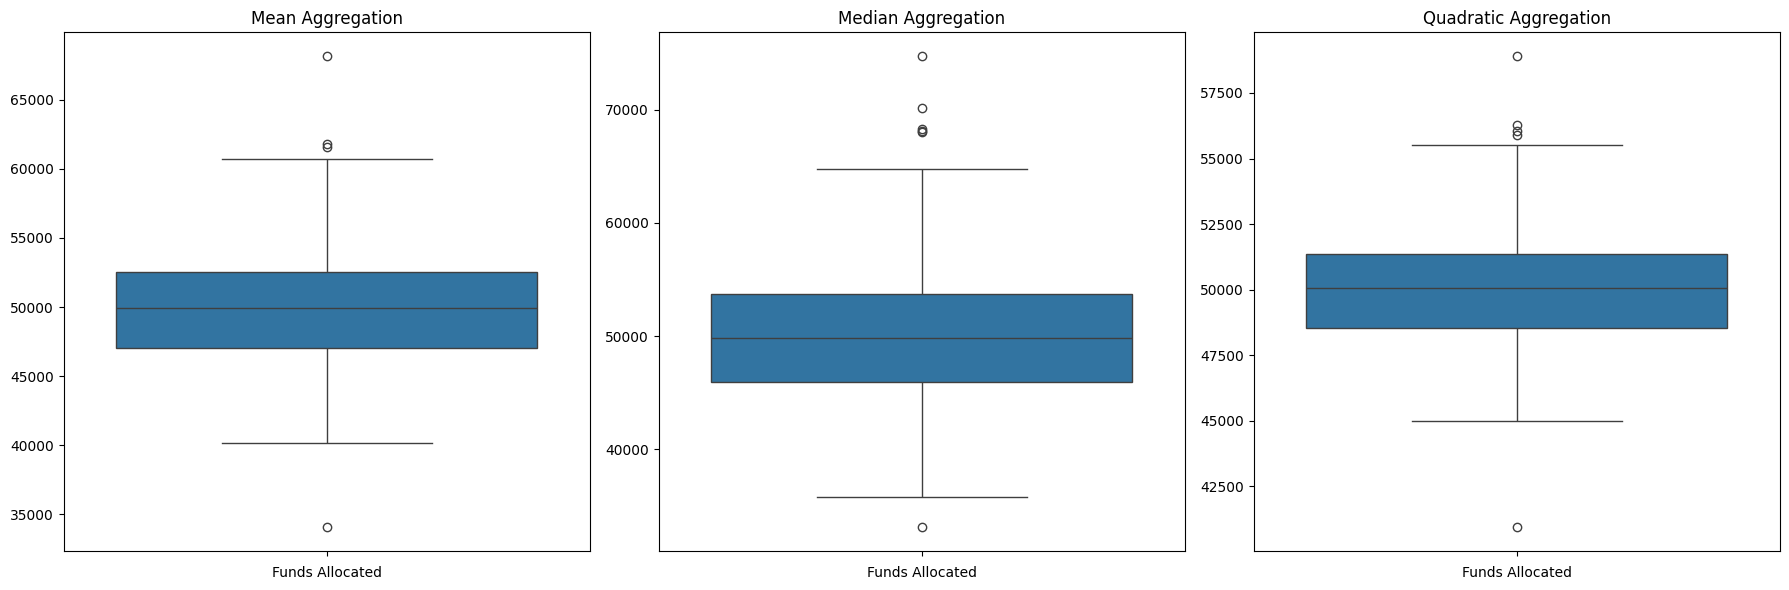

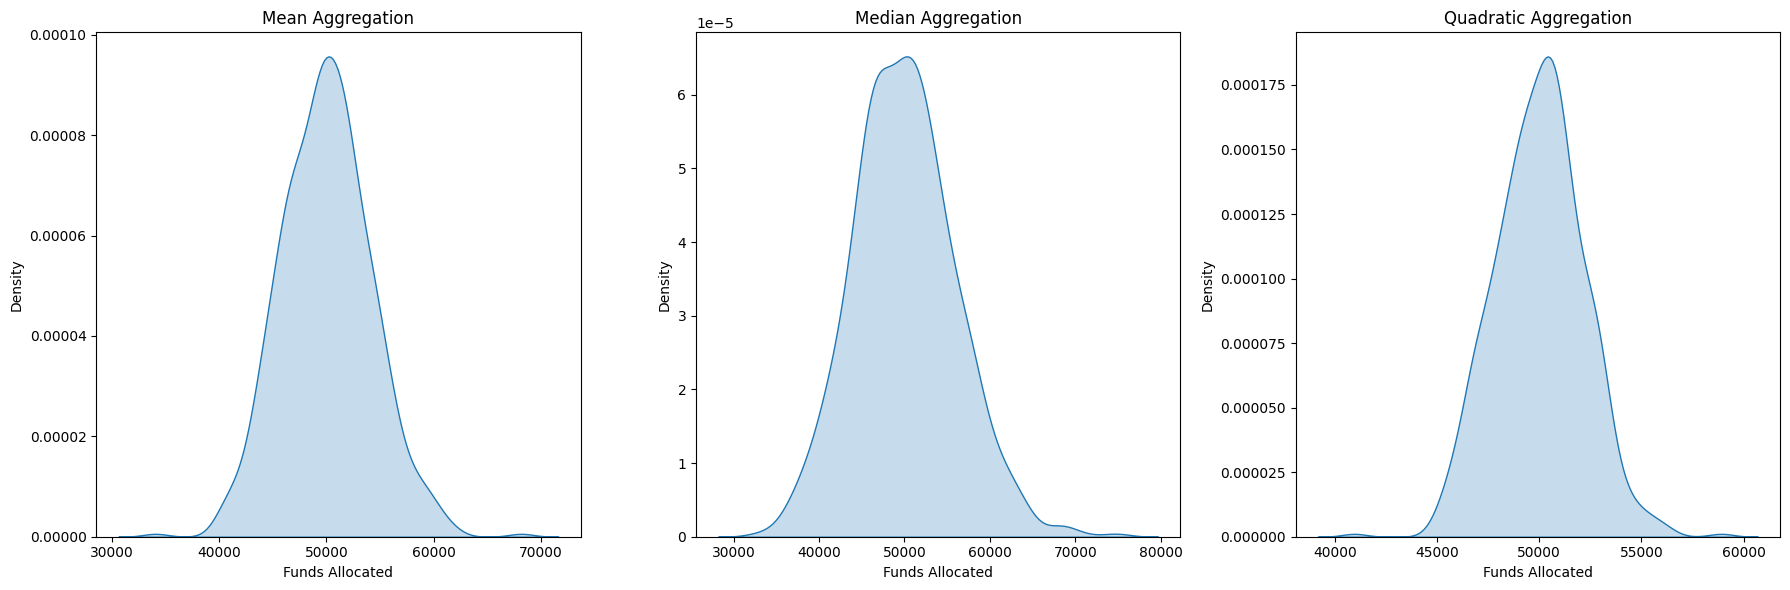

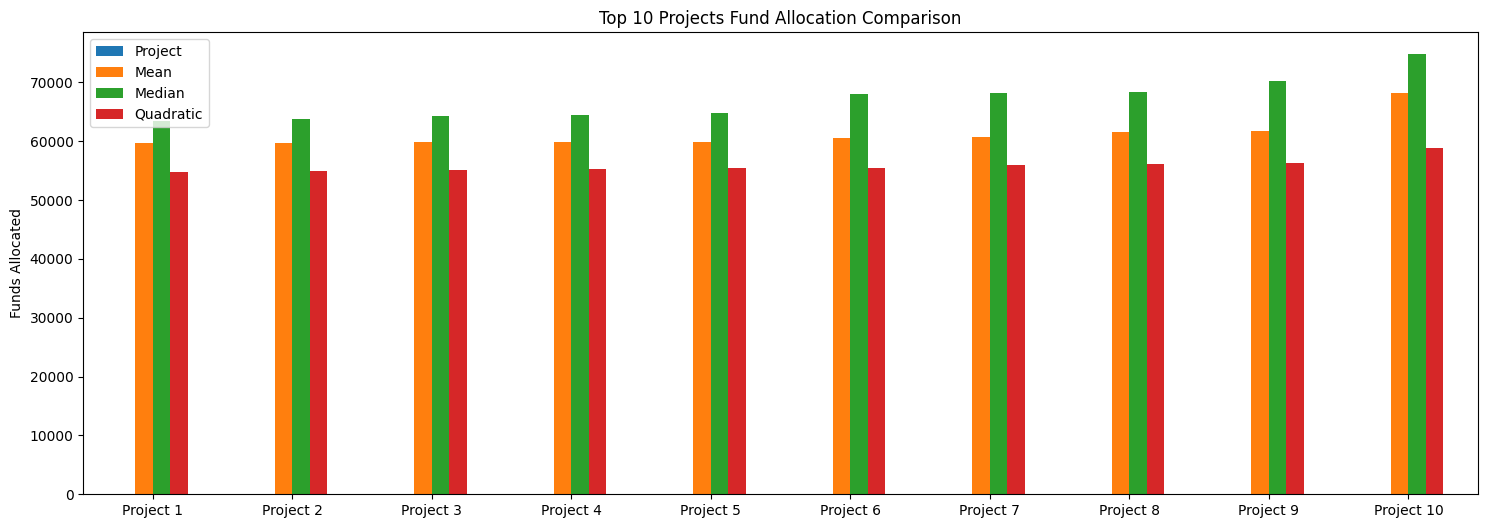

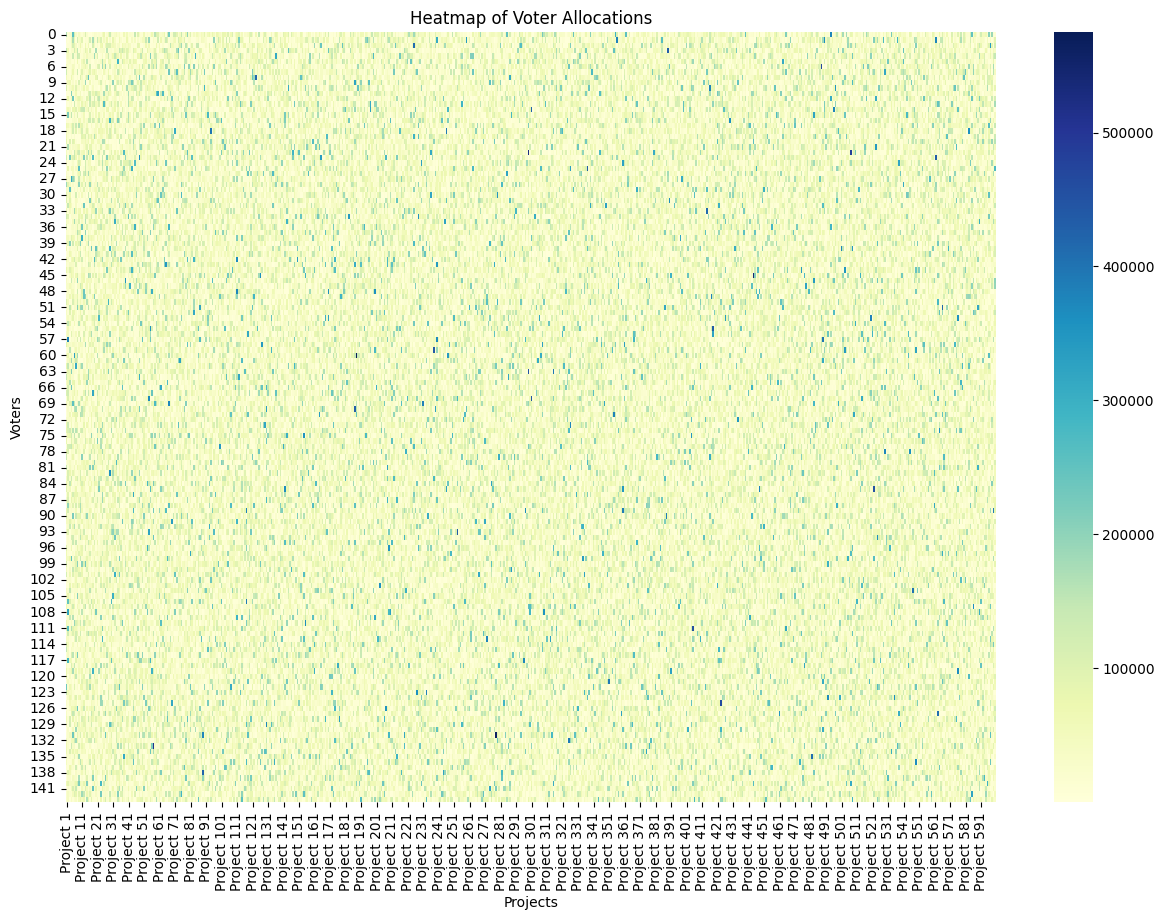

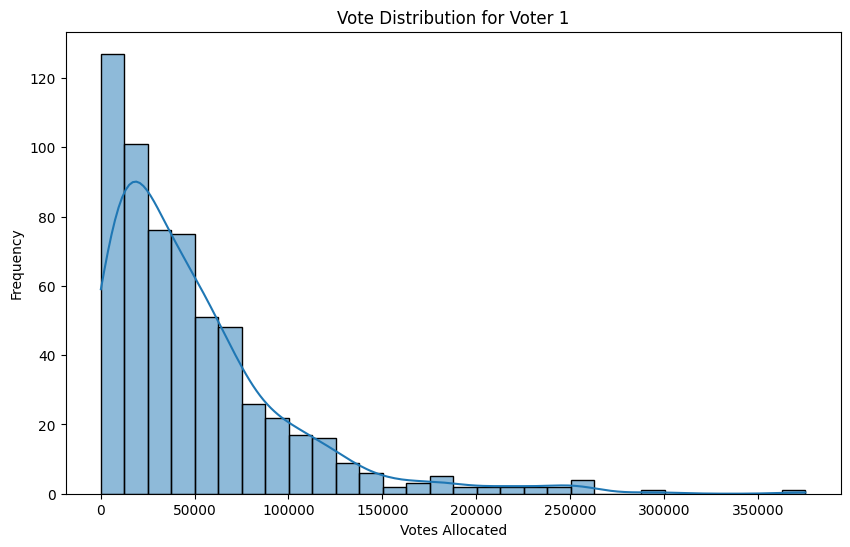

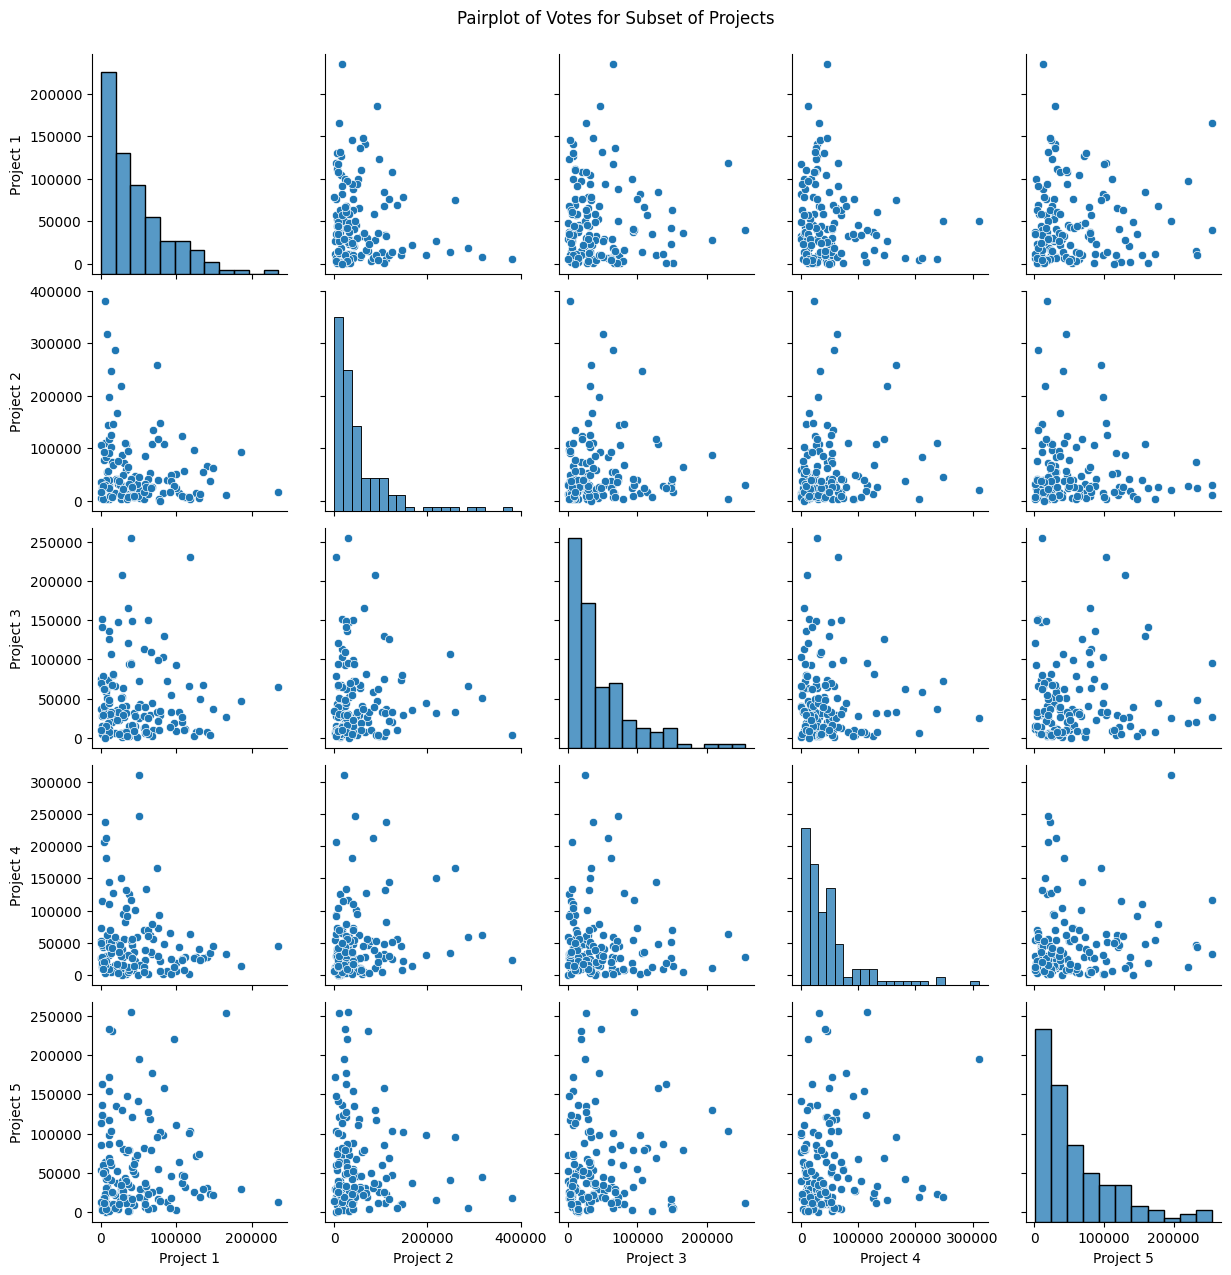

In [8]:

mean_allocations = model.allocate_funds("mean")
median_allocations = model.allocate_funds("median")
quadratic_allocations = model.allocate_funds("quadratic")
plot_aggregation_results(mean_allocations,median_allocations,quadratic_allocations,model.voting_matrix,10)

In [9]:
import pandas as pd
from model.EvalMetrics import calculate_alignment_with_ground_truth,calculate_gini_index,calculate_group_strategyproofness,calculate_robustness,calculate_social_welfare

# Initialize the mode
model = VotingModel(voter_type=voter_type,num_voters=num_voters, num_projects=num_projects, total_op_tokens=total_op_tokens)

# Define true values for the projects for the alignment metric
true_values = np.random.rand(num_projects)
def simulate_voting(model, num_rounds, metrics_functions):
    results = []
    for _ in range(num_rounds):
        model.step()
        round_results = {}
        for metric_name, metric_function in metrics_functions.items():
            round_results[metric_name] = metric_function(model)
        results.append(round_results)
    return pd.DataFrame(results)

# Initialize the model
model = VotingModel(voter_type=voter_type,num_voters=num_voters, num_projects=num_projects, total_op_tokens=total_op_tokens)

# Define true values for the projects for the alignment metric
true_values = np.random.randint(0, 2, size=num_projects)  # Example: binary "true values"

# Define the metrics functions dictionary
metrics_functions = {
    "robustness": calculate_robustness,
    "social_welfare": calculate_social_welfare,
    "gini_index": calculate_gini_index,
    "group_strategyproofness": calculate_group_strategyproofness,
    "alignment_with_ground_truth": lambda m: calculate_alignment_with_ground_truth(m, true_values)
}


simulation_results = simulate_voting(model, num_rounds, metrics_functions)
simulation_results


/Users/idrees/Code/govxs/agents/VoterAgent.py:7: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


# Voter Behaviour Model Anaylysis


In [12]:
from model.VoterBehaviours import random_uniform_model,rn_model, mallows_model,euclidean_model,multinomial_model,optimized_rn_model

In [13]:
# Parameters
n = 144
m = 600
K = 100
alpha = 2

# Run models
rn_votes = optimized_rn_model(n, m, K)
mallows_votes = mallows_model(n, m)
euclidean_votes = euclidean_model(n, m)
multinomial_votes = multinomial_model(n, m)

rn_votes, mallows_votes, euclidean_votes, multinomial_votes

(array([ 5,  6,  8, 10,  3,  6,  3,  1,  5,  6,  0,  8,  7,  2,  3,  4,  3,
         3,  4,  3,  3,  8,  5,  5,  3,  2,  7,  8,  2,  5,  5,  8,  4,  3,
         2,  4,  5,  6,  6,  2,  5,  5,  6,  4,  3,  5,  1,  5,  4,  4, 11,
         4,  5,  4,  5,  4,  3,  2,  2,  4,  4,  5,  4,  3,  5,  4,  5,  1,
         1,  6,  7,  4,  5,  4,  2,  1,  1,  0,  1,  3,  6,  2,  5,  5,  4,
         6,  2,  5,  1,  3,  2,  5,  5,  2,  4,  2,  5,  4,  6,  2,  3,  4,
         7,  4,  8,  2,  4,  0,  1,  3,  4,  5,  6,  4,  4,  6,  4,  4,  7,
         2,  2,  6,  3,  0,  5,  7,  3,  2,  4,  5,  5,  6,  4,  7,  9,  1,
         5,  6,  4,  6,  6,  2,  4,  5]),
 array([ 2,  3,  5,  2,  4,  3,  7,  4,  1,  4,  5,  6,  4,  4,  5,  1,  4,
         2,  5,  3,  6,  3,  4, 10,  2,  4,  5,  2,  2,  1,  6,  0,  8,  4,
         7,  5,  3,  7,  3,  4,  7,  5,  0,  4,  7,  4,  7,  6,  2,  5,  7,
         6,  1,  4,  3,  1,  3,  5,  3,  1,  4,  7,  4,  0,  0,  7,  5,  3,
         3,  7,  1,  5,  5,  7,  5,  3,  4,  1

In [5]:
voter_types = ['rn_model', 'mallows_model', 'euclidean_model', 'multinomial_model', 'random_uniform_model']
results = {}

for voter_type in voter_types:
    model = VotingModel(voter_type=voter_type, num_voters=num_voters, num_projects=num_projects, total_op_tokens=total_op_tokens)
    results[voter_type] = model.run_simulation()


/Users/idrees/Code/govxs/agents/VoterAgent.py:7: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


In [10]:
results['mallows_model']

,Project,Mean Aggregation,Median Aggregation,Quadratic Aggregation
0,Project 1,19.6,20.304569,19.864981
1,Project 2,18.0,19.796954,18.901958
2,Project 3,21.3,19.796954,20.639620
3,Project 4,18.7,17.766497,19.311642
4,Project 5,22.4,22.335025,21.281799


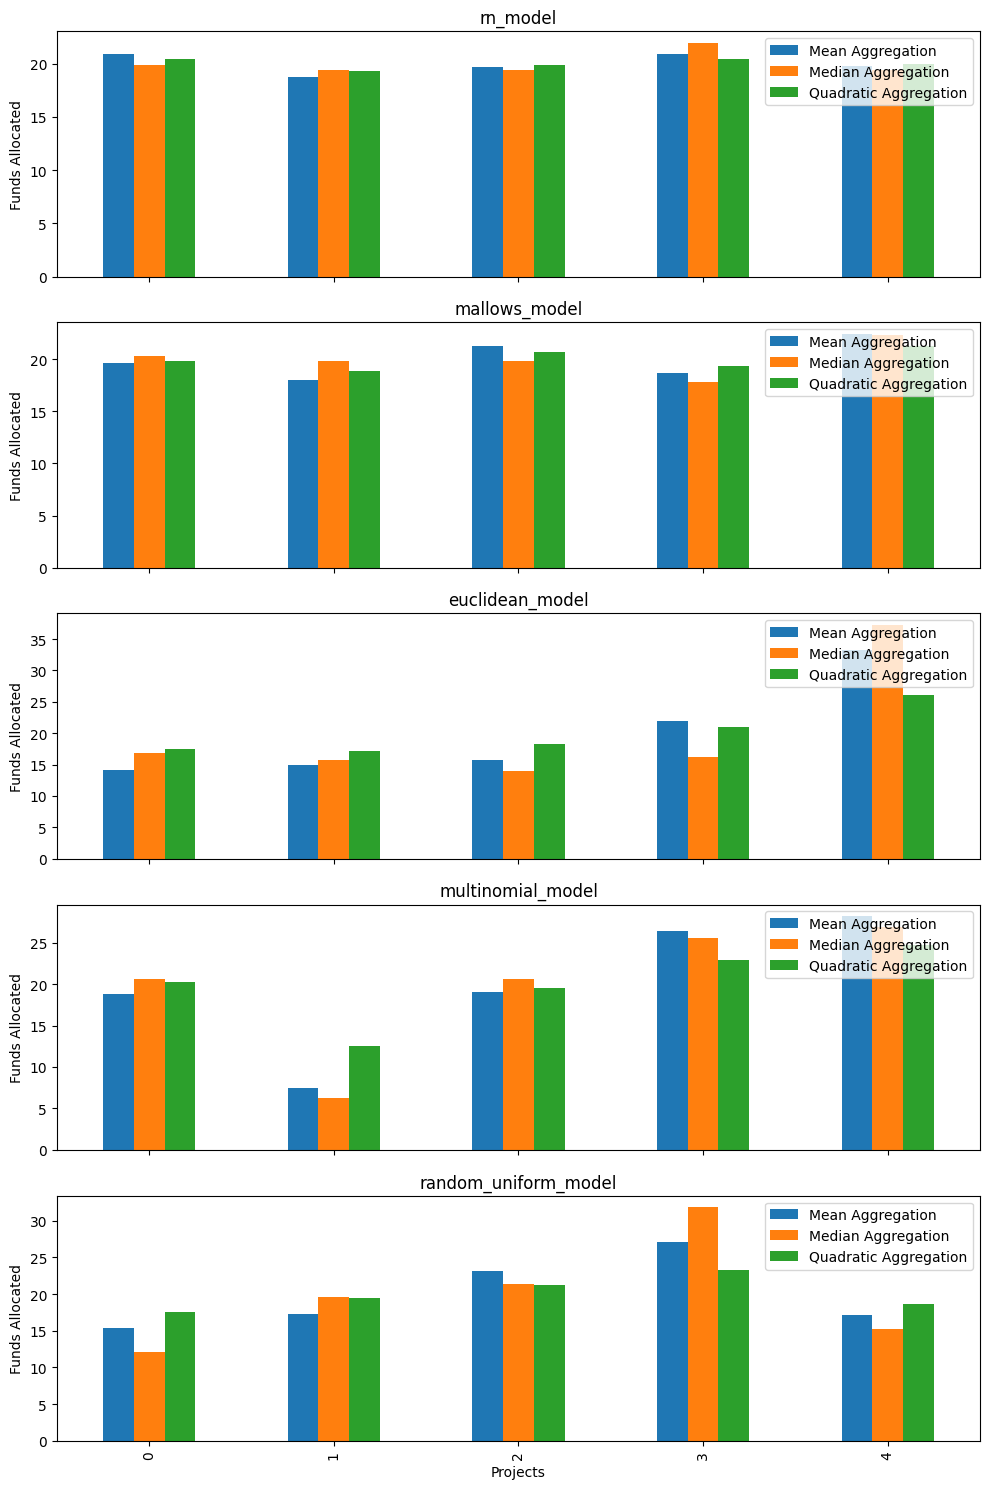

In [6]:
import matplotlib.pyplot as plt

def plot_results(results):
    fig, axes = plt.subplots(len(results), 1, figsize=(10, 15), sharex=True)

    for ax, (voter_type, result_df) in zip(axes, results.items()):
        result_df.plot(ax=ax, kind='bar', title=voter_type)
        ax.set_ylabel("Funds Allocated")
        ax.legend(loc='upper right')

    plt.xlabel("Projects")
    plt.tight_layout()
    plt.show()

plot_results(results)


In [7]:
voter_types = ['rn_model', 'mallows_model', 'euclidean_model', 'multinomial_model', 'random_uniform_model']


voting_matrices = {}

for voter_type in voter_types:
    model = VotingModel(voter_type=voter_type, num_voters=num_voters, num_projects=num_projects, total_op_tokens=total_op_tokens)
    model.step()
    voting_matrices[voter_type] = model.voting_matrix


/Users/idrees/Code/govxs/agents/VoterAgent.py:7: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


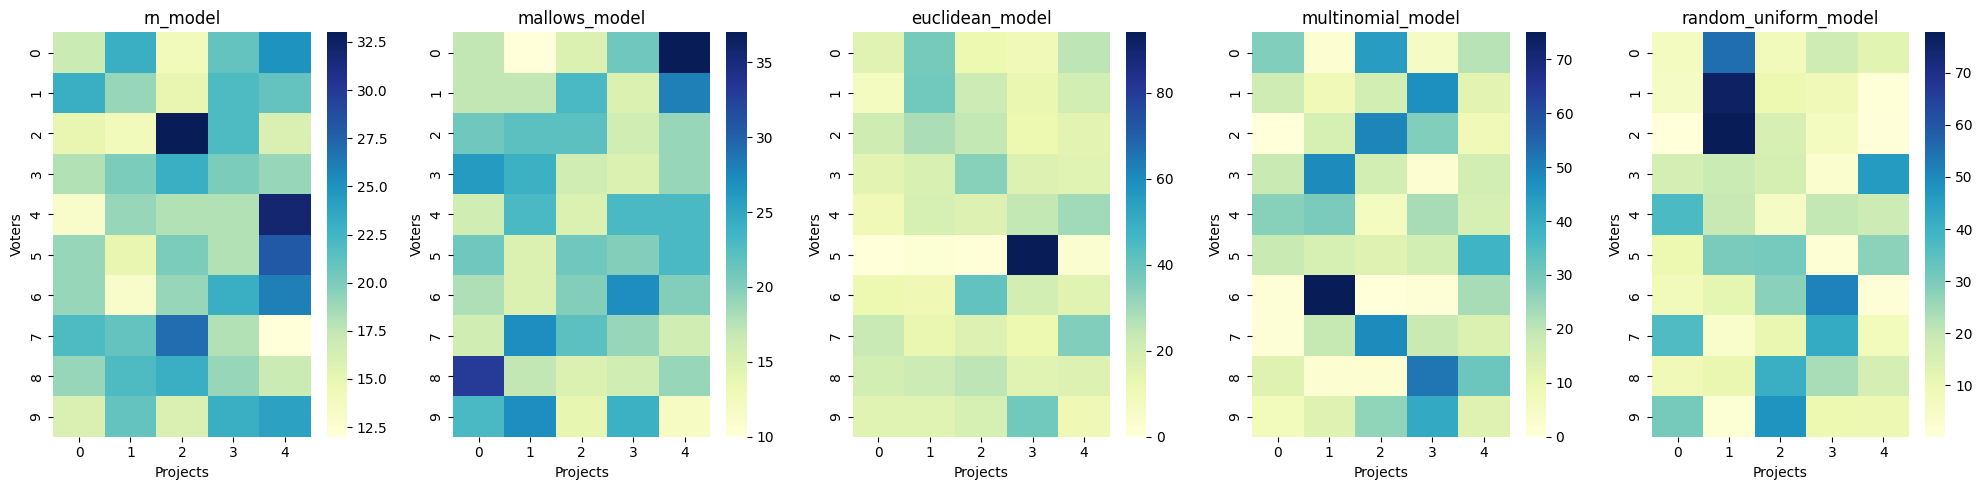

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_voting_matrices(voting_matrices):
    fig, axes = plt.subplots(1, len(voting_matrices), figsize=(20, 5))

    for ax, (voter_type, matrix) in zip(axes, voting_matrices.items()):
        sns.heatmap(matrix, ax=ax, cmap="YlGnBu", cbar=True)
        ax.set_title(voter_type)
        ax.set_xlabel("Projects")
        ax.set_ylabel("Voters")

    plt.tight_layout()
    plt.show()

plot_voting_matrices(voting_matrices)


# Verification of voter Behaviour